In [9]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq

In [10]:
from scipy.sparse import csr_matrix

#### Re-assemble Kuppe et al data

In [14]:
processed = sc.read_h5ad("data/10X_Visium_10X0026/rearrange/local.h5ad")

In [15]:
# here map two things, rearrange folders and what not
adata = sq.read.visium("data/10X_Visium_10X0026/rearrange")
adata.var_names_make_unique()
adata = adata[adata.obs_names.isin(processed.obs_names)]

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
adata.obs = processed.obs

In [17]:
adata.X = csr_matrix(adata.X)

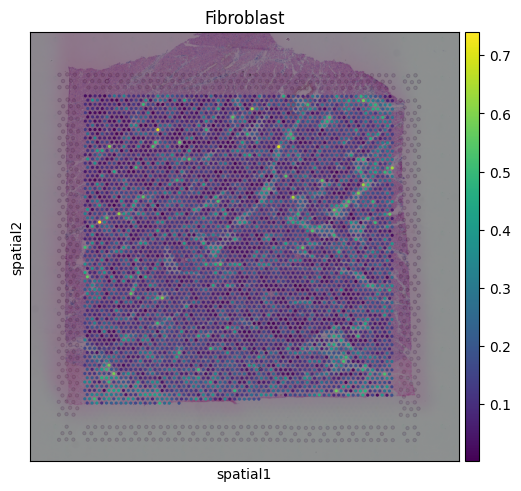

In [18]:
sq.pl.spatial_scatter(adata, color="Fibroblast")

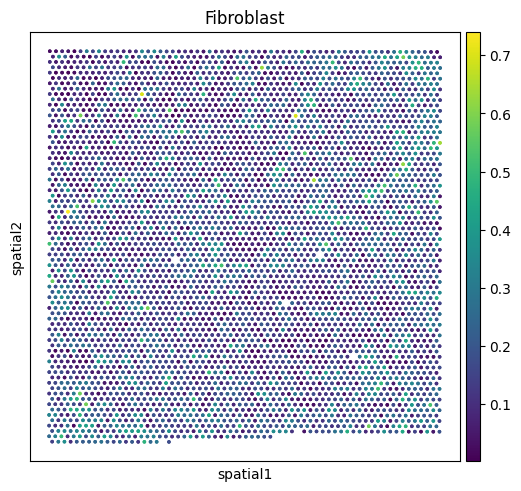

In [19]:
sq.pl.spatial_scatter(adata, shape=None, color="Fibroblast", size=10)

#### Filter & normalize

In [20]:
sc.pp.filter_cells(adata, min_genes=400)
sc.pp.filter_genes(adata, min_cells=5)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

#### Get Spatial Neighbors

In [21]:
sq.gr.spatial_neighbors(adata, n_rings=1, coord_type="grid", n_neighs=6)

#### Infer LR

In [22]:
from liana.mt.sp import lr_basis
from liana.mt.sp import basis

In [23]:
adata.X

<4659x18584 sparse matrix of type '<class 'numpy.float32'>'
	with 13872778 stored elements in Compressed Sparse Row format>

In [24]:
lr_basis(adata,
        function_name="cosine",
        expr_prop=0.1,
        pvalue_method=None, 
        use_raw=False, 
        #  positive_only:True,
        proximity_key="spatial_connectivities",
)

Attempt to predict cell type proportions from local LR scores.

In [25]:
X = adata.obsm['local_scores'].values

In [26]:
adata.obsm['local_scores']

interaction,LGALS9&PTPRC,MRC1&PTPRC,LGALS1&PTPRC,LGALS9&MET,ADAM10&MET,ADAM17&MET,SEMA5A&MET,DCN&MET,LRIG1&MET,TIMP3&MET,...,CALM3&KCNQ1,CALM1&AQP1,CALM2&AQP1,CALM3&AQP1,EFEMP2&AQP1,LMAN1&MCFD2,FABP5&RXRA,ARF6&SMAP1,AGTRAP&RACK1,NUCB2&ERAP1
AAACAACGAATAGTTC-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.378601,0.787754,0.785703,0.771303,0.374555,0.840459,0.000000,0.000000,0.606263,1.000000
AAACAAGTATCTCCCA-1,0.000000,0.559064,0.698109,0.000000,0.000000,1.000000,0.000000,0.268155,1.000000,0.390243,...,0.366088,0.609573,0.498502,0.559647,0.370752,0.861710,0.000000,0.000000,0.701708,0.890295
AAACAATCTACTAGCA-1,0.000000,0.000000,0.515621,0.000000,0.000000,1.000000,0.000000,0.404923,0.684843,0.393806,...,0.000000,0.756862,0.853812,0.661461,0.344325,0.685171,0.681363,0.397512,0.000000,0.000000
AAACACCAATAACTGC-1,1.000000,0.000000,0.455080,0.000000,0.504920,0.374403,0.000000,0.679678,0.708192,0.823426,...,0.000000,0.963360,0.771766,0.763326,0.521720,0.588829,0.491788,0.271455,0.726944,0.000000
AAACAGAGCGACTCCT-1,0.000000,0.000000,0.403148,0.637029,0.334296,0.000000,0.000000,0.589967,0.279348,0.737991,...,0.296228,0.909965,0.857022,0.879881,0.000000,0.981358,0.587454,0.518186,0.611693,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.000000,0.000000,0.453929,0.251608,0.590176,0.000000,0.000000,0.698235,0.143965,0.727016,...,0.474158,0.697625,0.591295,0.680623,0.492113,0.000000,0.000000,0.000000,0.808105,0.000000
TTGTTTCACATCCAGG-1,0.000000,0.718873,0.667003,0.000000,0.282652,0.642351,0.212036,0.840297,0.261322,0.825742,...,0.000000,0.864186,0.812758,0.915558,0.751964,0.000000,0.721506,0.294684,0.791769,0.000000
TTGTTTCATTAGTCTA-1,0.693935,0.572475,0.840028,0.676268,0.373265,0.000000,0.000000,0.617732,0.000000,0.410515,...,0.000000,0.681448,0.475147,0.713900,0.693884,0.316778,0.448599,0.509415,0.744184,0.860740
TTGTTTCCATACAACT-1,0.000000,0.000000,0.000000,0.000000,0.420212,0.000000,0.000000,0.336239,0.000000,0.447789,...,0.000000,0.844179,0.758295,0.723720,0.000000,0.000000,0.264115,0.407498,0.489024,0.000000


In [27]:
X.shape

(4659, 655)

In [28]:
celltypes = ['Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs']

In [29]:
y = adata.obs[celltypes].values

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [31]:
# Assuming X is a 2D array with shape (n_samples, n_features)
# and y is a 2D array with shape (n_samples, n_targets)
X_train, X_test, y_train, y_test = train_test_split(X, y[:,5], test_size=0.2, random_state=1337)


In [32]:
y_test.shape

(932,)

In [33]:
# Initialize the Random Forest Regressor with default parameters
rf = RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=1337)

In [34]:
# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=1337)

In [36]:
rf.oob_score_

-0.11816159453038244

In [37]:
# Use the trained model to predict the test data
y_pred = rf.predict(X_test)

In [38]:
# Calculate the R^2 score as a measure of model performance
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: -0.09993284555874982


Are there cell types that are predicted?

In [ ]:
rf.feature_importances_.shape

(655,)

Transcription factors to predict cell type proportions?